# Capstone Two: Data Wrangling

#### Clickstream Data for Online Shopping
#### Dataset: https://archive.ics.uci.edu/dataset/553/clickstream+data+for+online+shopping

### Data Science Problem
An online clothing shop for pregnant women is facing more competition from other online retailers and is looking to refine its marketing approach.  It currently does not do any targeted marketing based on categorical data or clustering, but is aware that many of its competitors have shifted to this approach.  Using clickstream data from five months in 2008, this retailer would like to better understand its customer base through data analytics, specifically classification and clustering, in order to launch a targeted marketing campaign this coming spring.  A successful campaign would lead to a growth in sales without having to increase spending on marketing.

In [7]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [15]:
#Load shopping data
shopping_data = pd.read_csv('dataset/e-shop clothing 2008.csv', delimiter=';')

In [17]:
#Summary of data
shopping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

In [21]:
#View head of table
shopping_data.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [27]:
#Check for missing values
missing = pd.concat([shopping_data.isnull().sum(), 100 * shopping_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
year,0,0.0
month,0,0.0
day,0,0.0
order,0,0.0
country,0,0.0
session ID,0,0.0
page 1 (main category),0,0.0
page 2 (clothing model),0,0.0
colour,0,0.0
location,0,0.0


There are no missing values.

In [42]:
#Check for number of different countries and frequency
shopping_data['country'].value_counts()

country
29    133963
9      18003
24      4091
46      2522
44      1385
16       834
21       811
34       716
41       684
3        256
27       227
12       210
42       170
37       163
10       152
31       144
22       144
28       139
38       137
15       125
11       115
25        71
2         58
32        49
23        46
14        43
39        34
43        31
19        29
17        23
36        19
18        18
20        10
7          9
47         7
45         6
6          5
30         5
5          4
33         3
1          3
35         3
13         2
26         2
40         1
4          1
8          1
Name: count, dtype: int64

In [44]:
#Check for number of different session IDs and frequency
shopping_data['session ID'].value_counts()

session ID
22433    195
13846    192
22902    185
8201     161
19623    142
        ... 
9304       1
12449      1
4663       1
9308       1
19217      1
Name: count, Length: 24026, dtype: int64

In [31]:
#Check for number of different pages and frequency 
shopping_data['page 1 (main category)'].value_counts()

page 1 (main category)
1    49742
4    38747
3    38577
2    38408
Name: count, dtype: int64

In [34]:
#Check for number of different models and frequency
shopping_data['page 2 (clothing model)'].value_counts()

page 2 (clothing model)
B4     3579
A2     3013
A11    2789
P1     2681
B10    2566
       ... 
P66      46
P22       2
P79       2
P54       1
P28       1
Name: count, Length: 217, dtype: int64

In [36]:
#Check for number of different colors and frequency
shopping_data['colour'].value_counts()

colour
2     29764
3     29259
6     17476
4     16517
14    15939
9     13531
12     8830
1      7785
7      6876
13     6295
11     5292
10     3579
8      2664
5      1667
Name: count, dtype: int64

In [38]:
#Check for number of locations and frequency
shopping_data['location'].value_counts()

location
1    34532
2    33383
5    27783
4    27377
3    21656
6    20743
Name: count, dtype: int64

Items appear to be located based on their popularity.  It's unclear from the data if the most popular items are first because they are the most popular or if they are only purchased most often because they are first.

In [40]:
#Check for number of model photography and frequency
shopping_data['model photography'].value_counts()

model photography
1    122439
2     43035
Name: count, dtype: int64

In [46]:
#Check number of unique values in columns
shopping_data[['country', 'session ID', 'page 1 (main category)', 'page 2 (clothing model)', 'colour', 'location', 'model photography']].nunique()

country                       47
session ID                 24026
page 1 (main category)         4
page 2 (clothing model)      217
colour                        14
location                       6
model photography              2
dtype: int64

In [77]:
#Check for duplicates
duplicates = shopping_data.duplicated()
print("Duplicates in DataFrame:")
print(duplicates)

Duplicates in DataFrame:
0         False
1         False
2         False
3         False
4         False
          ...  
165469    False
165470    False
165471    False
165472    False
165473    False
Length: 165474, dtype: bool


In [79]:
#Create date column for easier filtering during EDA
shopping_data['date'] = pd.to_datetime(shopping_data[['year', 'month', 'day']])

In [94]:
#Check for nubmer of dates and frequency
shopping_data['date'].value_counts()

date
2008-04-02    3456
2008-04-01    3181
2008-04-10    1854
2008-04-03    1854
2008-04-18    1833
              ... 
2008-06-14     627
2008-05-31     621
2008-05-03     594
2008-07-19     538
2008-08-13     200
Name: count, Length: 135, dtype: int64

In [85]:
#Convert price column to float data type
shopping_data['price'] = shopping_data['price'].astype(float)

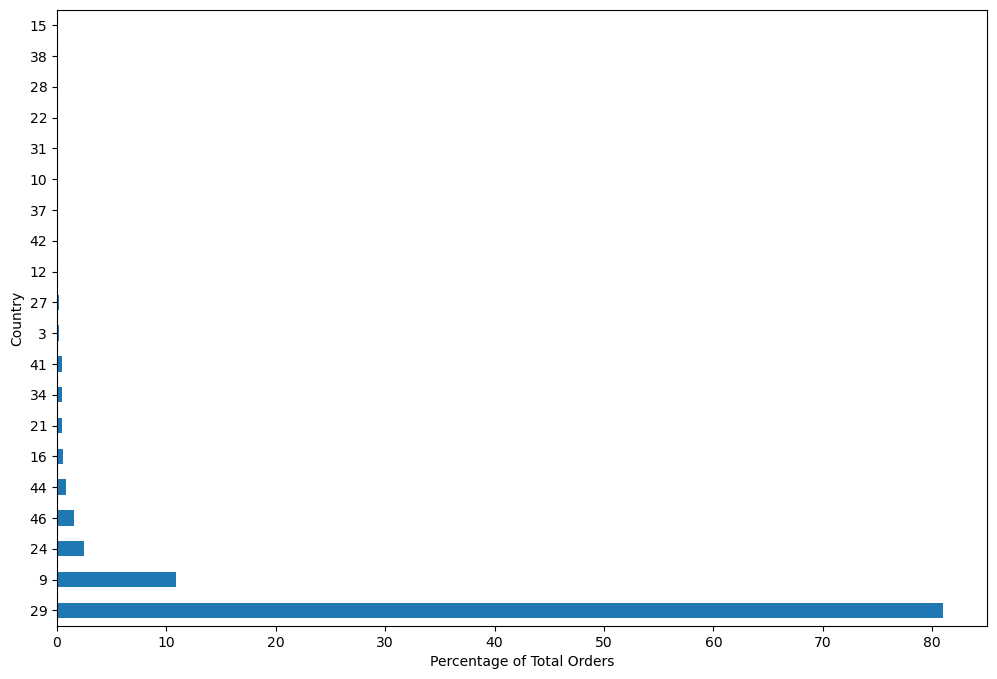

In [70]:
#Plot percentage of orders by country
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(12, 8))
(shopping_data.country.value_counts(normalize=True) * 100).head(20).plot(kind='barh', ax=ax)
ax.set_ylabel('Country')
ax.set_xlabel('Percentage of Total Orders')
plt.subplots_adjust(wspace=0.5)

Of the 47 countries in the dataset, Country 29 has over 80% of the customers.  Country 9 has over 10%.  The remaining less than 10% is spread through the remaining 45 countries.

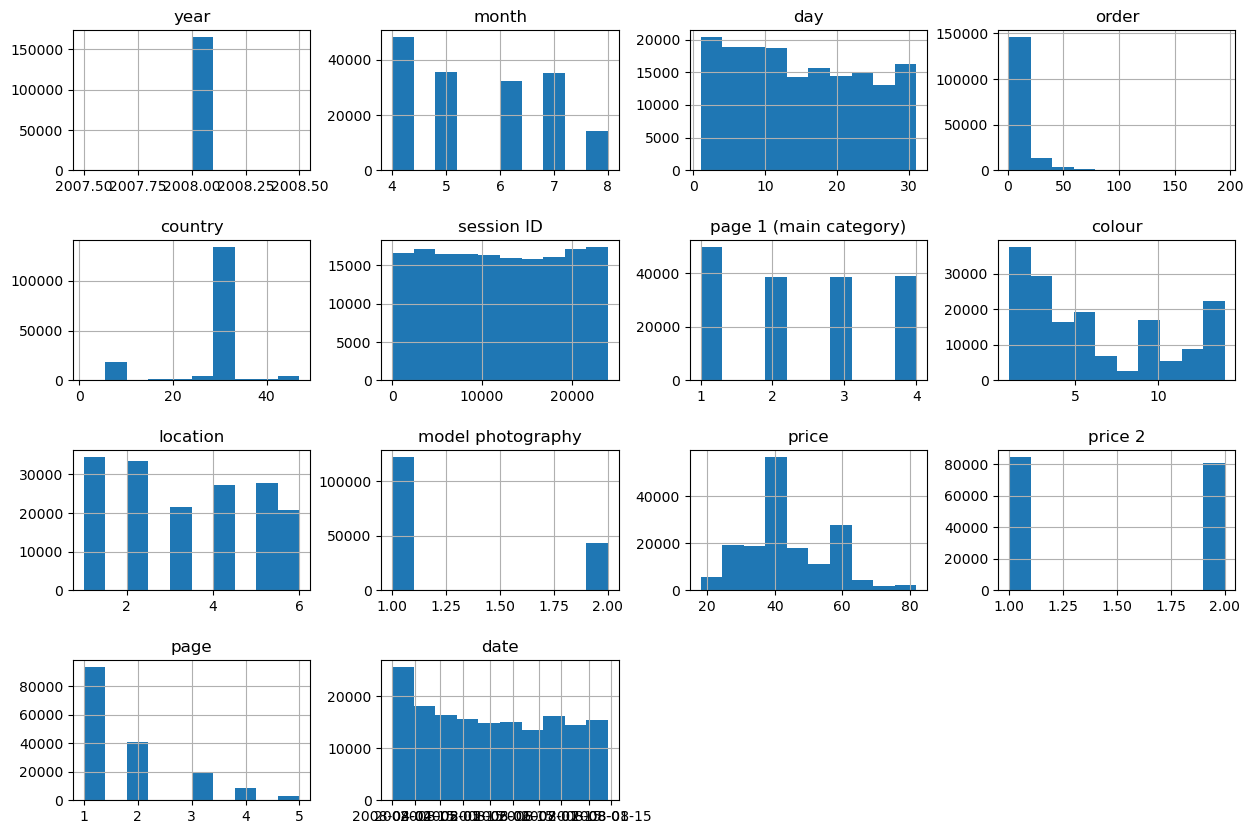

In [87]:
#Generating histograms to check for outliers
shopping_data.hist(figsize = (15, 10))
plt.subplots_adjust(hspace=0.5);

No outlier data found in dataset when examining histograms

In [92]:
shopping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   year                     165474 non-null  int64         
 1   month                    165474 non-null  int64         
 2   day                      165474 non-null  int64         
 3   order                    165474 non-null  int64         
 4   country                  165474 non-null  int64         
 5   session ID               165474 non-null  int64         
 6   page 1 (main category)   165474 non-null  int64         
 7   page 2 (clothing model)  165474 non-null  object        
 8   colour                   165474 non-null  int64         
 9   location                 165474 non-null  int64         
 10  model photography        165474 non-null  int64         
 11  price                    165474 non-null  float64       
 12  price 2         

### Summary
After importing data and reviewing the summary, I checked for missing values, which there were none. I checked the various values in each column and the frequence of each value.  I also checked for duplicate rows, which there were none.  I created a date column using the separate year, month, and day columns for easier filtering later on in the project.  I also convered the price column from an integer to a float to prepare for future calculations.  To check for outliers, I plotted the percentage of rows by country and created histograms of each column.  These plots revealed that a majority of the purchases come from one country, but does not indicate the existence of any errant data.  The histograms also did not indicate there were any rows of data that needed to be removed.